#**torch.nn**


Neural networks comprise of layers/modules that perform operations on data. The ```torch.nn``` namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

[torch.nn](https://pytorch.org/docs/stable/nn.html)

In [ ]:
import torch
import torch.nn as nn

#**Activation Functions**

PyTorch implements a number of activation functions including but not limited to ReLU, Tanh, and Sigmoid. Since they are modules, they need to be instantiated.

Sigmoid
-------------

A sigmoid layer applies a sigmoid function to the input such that the output is bounded in the interval (0,1).

In [ ]:
activation_fn = nn.Sigmoid() # we instantiate an instance of the Sigmoid module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0.2689, 0.7311, 0.5000])


Tanh
----------------------------

A tanh activation layer applies the tanh function on the layer inputs.

In [ ]:
activation_fn = nn.Tanh() # we instantiate an instance of the Tanh module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([-0.7616,  0.7616,  0.0000])


ReLU
-------------

A ReLU layer performs a threshold operation to each element of the input, where any negative input is set to zero and it returns any positive input back.

In [ ]:
activation_fn = nn.ReLU() # we instantiate an instance of the ReLU module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])


ELU
----------------------------

An ELU activation layer performs the identity operation on positive inputs and an exponential nonlinearity on negative inputs.


In [ ]:

activation_fn = nn.ELU() # we instantiate an instance of the ELU module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated) # exp(-1)-1, 1, 0

example_tensor tensor([-1.,  1.,  0.])
activated tensor([-0.6321,  1.0000,  0.0000])


#**Loss functions**

PyTorch implements many common loss functions including `MSE Loss`, and `CrossEntropy Loss`.

You have studied these loss functions in Week 3. Please check your lecture slides to remember them if needed.


MSE Loss
-------------

In general, mean squared error (MSE) is the most commonly used loss function for regression task.

In [ ]:
mse_loss_fn = nn.MSELoss() # construct MSE loss

# create input and target
input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[1., 0, -1]])

loss = mse_loss_fn(input, target) # compute MSE loss of the input and target

print(loss)

tensor(0.6667)


CrossEntropyLoss
--------------------------------

Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. 
It is useful when training a classification problem with **C** classes. PyTorch implements a version of the cross entropy loss in one module called [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss). It combines `logsoftmax` and `nll_loss` in a single function. 


$logsoftmax(x) = log\frac{e^{x_i}}{\sum_{j}e^{x_j}}$

$loss = nll\_loss(logsoftmax(input,target)) = -\frac{1}{N}\sum_{i=1}^{N} y_i(logsoftmax)$

where $y_i$ is one-hot label after encoding.

In [ ]:
'''
loss = nn.CrossEntropyLoss() # Define the loss
output = loss(input, target) # have 2 parameters
'''

- input: The first parameter to CrossEntropyLoss is the output of our network. It is expected to contain raw, unnormalized scores for each class. It has to be a Tensor of size $(N,C)$. $N$ is the minibatch size and $C$ is the number of classes.

- target: The second parameter to CrossEntropyLoss is the true label. It expects an *integer valued* tensor of dimension $(N)$.

- output: The result for CrossEntropyLoss loss.The lower output means the network conduct a better prediction. And the loss increases as the predicted probability diverges from the actual label

**Example:** Try out the loss function on three toy predictions. The true class labels are $y=[1,1,0]$.


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# input is of size nBatch x nClasses = 3 x 2
# input must be raw, unnormalizes scores (logits) for each class
input = torch.tensor(
    [[-1., 1], # the score for class 0: -1, the score for class 1: 1; -1< 1; -> predict class 1
     [-2, 2],  # predict class 1
     [1, -1]]) # predict class 0 
# raw scores correspond to the correct class

#input = torch.tensor([[-3., 3],[-3, 3],[4, -4]]) # raw scores correspond to the correct class with higher confidence
#input = torch.tensor([[1., -1],[1, -1],[-1, 1]]) # raw scores correspond to the incorrect class
#input = torch.tensor([[3., -3],[3, -3],[-3, 3]]) # raw scores correspond to the incorrect class with incorrectly placed confidence

# verify the predicted class for input
_, predictions = torch.max(input, 1)

# target is of size nBatch = 3 
# each element has class label: 0, 1
target = torch.tensor([1, 1, 0])
print(f'Actual class:{target}, Prediction class: {predictions}')

## use math method to calculate cross entropy loss
softmax = torch.exp(input)/torch.sum(torch.exp(input), dim = 1).reshape(-1, 1)
logsoftmax = torch.log(softmax)

one_hot = F.one_hot(target).float()

output1 = -torch.sum(one_hot*logsoftmax)/target.shape[0]
print(f'mathematical result: {output1:.4f}')

## use torch.nn.function to calculate cross entropy loss
logsoftmax = F.log_softmax(input, dim = 1)
output2 = F.nll_loss(logsoftmax, target) # not need to encoder labels to one hot vector 
print(f'function result: {output2:.4f}')

## directly use torch.nn.CrossEntropyLoss
loss = nn.CrossEntropyLoss() # applies logsoftmax and encoder labels to one-hot vector
output3 = loss(input, target)
print(f'direct result: {output2:.4f}')

Actual class:tensor([1, 1, 0]), Prediction class: tensor([1, 1, 0])
mathematical result: 0.0018
function result: 0.0018
direct result: 0.0018



The first two examples correspond to predictions that are "correct" in that they have higher raw scores for the correct class. 

The second example is "more confident" in the prediction, leading to a smaller loss.

The last two examples are incorrect predictions with lower and higher confidence respectively.

#**Optimization**

torch.optim
------------------------

PyTorch implements a number of gradient-based optimization methods in `torch.optim`, including Gradient Descent. At the minimum, it takes in the model parameters and a learning rate.

[torch.optim ](https://pytorch.org/docs/stable/optim.html)

Construct an optimizer
------------------------

To construct an optimizer you have to give it an iterable containing the parameters (all should be Variable s) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.

Example:

In [ ]:
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) Construct an optimizer using stochastic gradient descent (SGD)
# optimizer = optim.Adam([var1, var2], lr=0.0001) Construct an optimizer using Adam

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. 

Pytorch doc: [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)


Paper: [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)

Apply an optimizer
------------------------
All optimizers implement a step() method, that updates the parameters. This is a simplified version supported by most optimizers. The function can be called once the gradients are computed using e.g. backward().

In [ ]:
'''
for input, target in dataset:
    optimizer.zero_grad()
    output = model(input)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
'''

Example: Use stochastic gradient descent optimization method


In [ ]:
# create a simple model
model = nn.Linear(1, 1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
# optim = optim.Adam(model.parameters(), lr=0.0001) 

# create loss function
mse_loss_fn = nn.MSELoss()

# apply our optimizer 

y_predicted = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_predicted , y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[-0.7717]], requires_grad=True)
model params after: Parameter containing:
tensor([[-0.6998]], requires_grad=True)


#**Train Pipeline**

0) Preprocess data

1) Design model (input, output, forward pass with different layers)

2) Construct loss and optimizer

3) Training loop
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

Example from Practice Session 1 -- Linear Module
------------------------------------------

Assume we have $x$ = {1, 2, 3, 4} and $y$ = {2, 4, 6, 8} and we also know $y = wx$. Please find the weights $w$ and predict the value of $y$ when $x$ = 5.

In [ ]:
import torch
import torch.nn as nn

# f = w * x 

# here : f = 2 * x

# 0) Create training samples
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) # 2D array
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

### w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) -> model.parameters()/model.weights()

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size) # Takes the input and output dimensions as parameters, and creates the weights in the object.

# Define a class model, which is more common.
'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') # model(tensor) # Tensor.item returns the value of this tensor as a standard Python number. This only works for tensors with one element. 

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # model.parameters() = weights

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()
    ### with torch.no_grad():
      ### w.data -= learning_rate * w.grad

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('{},\t{:.2f},\t{}'.format(epoch, l.item(), model.weight.view(1).detach().numpy()))

        

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = -4.606
0,	68.42,	[-0.32232922]
10,	1.78,	[1.5738813]
20,	0.05,	[1.8804379]
30,	0.01,	[1.9312541]
40,	0.00,	[1.9408906]
50,	0.00,	[1.9438599]
60,	0.00,	[1.9457151]
70,	0.00,	[1.9473501]
80,	0.00,	[1.9489105]
90,	0.00,	[1.9504205]
Prediction after training: f(5) = 9.901


Unlike how we initialized our  $w$  manually, the Linear module automatically initializes the weights randomly. For minimizing non convex loss functions (e.g. training neural networks), initialization is important and can affect results.

An example using SGD
-----------------------------------------

In the previous example, we computed the average gradient over the entire dataset (Gradient Descent). 

We can implement Stochastic Gradient Descent with a simple example.

In [ ]:
import numpy as np
# make a simple linear dataset with some noise

# 0) Training samples
d = 2
n = 50
X = torch.randn(n,d)
true_w = torch.tensor([[-1.0], [2.0]])
# 0) create a test sample
Y = X @ true_w + torch.randn(n,1) * 0.1

# 1) Design Model
model = nn.Linear(d, 1)

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 200

loss = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

print('iter,\tloss,\tw')

# 3) Training loop
for i in range(n_iters):
    rand_idx = np.random.choice(n) # take a random point from the dataset
    x = X[rand_idx]

    # predict = forward pass with our model 
    y_predicted = model(x)

    # loss
    l = loss(Y[rand_idx],y_predicted) # only compute the loss on the single point
    
    # calculate gradients = backward pass
    l.backward()
   
    # update weights
    optim.step()

    # zero the gradients after updating
    optim.zero_grad()
    
    if i % 20 == 0:
        print('{},\t{:.2f},\t{}'.format(i, l.item(), model.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', model.weight.view(2).detach().numpy())

iter,	loss,	w
0,	4.39,	[-0.03254028 -0.01029856]
20,	2.11,	[-0.642412   0.6455283]
40,	1.57,	[-0.82627547  0.85107803]
60,	1.66,	[-0.94858325  1.3315189 ]
80,	1.00,	[-1.071996   1.5220559]
100,	0.07,	[-1.0877447  1.6229335]
120,	0.05,	[-1.0702426  1.6688992]
140,	0.14,	[-1.0652051  1.7421176]
160,	0.02,	[-1.0745375  1.7875966]
180,	0.01,	[-1.0481572  1.8397346]

true w		 [-1.  2.]
estimated w	 [-1.0531844  1.8696793]


#**Weights Initialization**

Weights initialization is important and can affect results.PyTorch implements some common initializations in [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html).

Single layer
------------------------------

To initialize the weights of a single layer, use a function from [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html).

For instance:

In [ ]:
# create a model
model = nn.Linear(2, 2)

# weight initialization by using functions from torch.nn.init

weights = torch.nn.init.uniform_(model.weight, a=0.0, b=1.0) # Fills the input Tensor with values drawn from the uniform distribution U(a,b).
print('Example 1:\n',weights.data) 

con_weight = torch.nn.init.constant_(model.weight, 0.5) # Fills the input Tensor with the value 0.5.
print('Example 2:\n',con_weight.data)

ones_weight = torch.nn.init.ones_(model.weight) # Fills the input Tensor with the scalar value 1.
print('Example 3:\n',con_weight.data) 


Example 1:
 tensor([[0.1276, 0.5158],
        [0.2473, 0.6403]])
Example 2:
 tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])
Example 3:
 tensor([[1., 1.],
        [1., 1.]])


#**Logistic Regression Example**

Implement a logistic regression model to do image classification task based on MNIST dataset.

[MNIST](http://yann.lecun.com/exdb/mnist/)

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np

'''
Step 1: Loading dataset 
'''

train_dataset = datasets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Plot image of MNIST
#show_img = train_dataset[0][0].numpy().reshape(28, 28)
#plt.imshow(show_img, cmap='gray')

# Get label for the image
#print(train_dataset[0][1])

'''
Step 2: Making dataset iterable (DataLoader) + Design Hyper-parameters 
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
Step 3: Design Model by creating model class 
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out


# Instantiate model class 

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

# Use GPU for model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
Step 4: Define loss and optimizer
'''
criterion = nn.CrossEntropyLoss()


learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
Step 5: Train the model
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # USE GPU FOR MODEL
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                # USE GPU FOR MODEL
                images = images.view(-1, 28*28).to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # USE GPU FOR MODEL
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Iteration: 500. Loss: 1.8863600492477417. Accuracy: 65.43
Iteration: 1000. Loss: 1.545007348060608. Accuracy: 77.5
Iteration: 1500. Loss: 1.3564796447753906. Accuracy: 80.44
Iteration: 2000. Loss: 1.1032294034957886. Accuracy: 81.73
Iteration: 2500. Loss: 1.0240752696990967. Accuracy: 82.47
Iteration: 3000. Loss: 1.0347490310668945. Accuracy: 83.11


[Reference](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_logistic_regression/)

#**Regularization**

Add Dropout to a PyTorch Model

In [ ]:
# torch.nn.Dropout(p=0.5, inplace=False)

During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. Each channel will be zeroed out independently on every forward call.

In [ ]:
class Net(nn.Module):
  def __init__(self, input_shape=(3,32,32)):
    super(Net, self).__init__()
    
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64, 128, 3)
    
    self.pool = nn.MaxPool2d(2,2)

    n_size = self._get_conv_output(input_shape)
    
    self.fc1 = nn.Linear(n_size, 512)
    self.fc2 = nn.Linear(512, 10)

    ''' 
    Define proportion or neurons to dropout
    '''
    self.dropout = nn.Dropout(0.25)
      
  def forward(self, x):
    x = self._forward_features(x)
    x = x.view(x.size(0), -1)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    ''' 
    Apply dropout
    ''' 
    x = self.dropout(x)
    x = self.fc2(x)
    return x

#**Sequential**
----------------------------------------

Many times, we want to compose Modules together. `torch.nn.Sequential` provides a good interface for composing simple modules.

In [ ]:
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
                            nn.Linear(d_in, d_hidden),
                            nn.Tanh(),
                            nn.Linear(d_hidden, d_out),
                            nn.Sigmoid()
                           )

example_tensor = torch.tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print('transformed', transformed.shape) # why?

transformed torch.Size([2, 1])


**Weight initialization** for sequential layers

In [ ]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

#**Convolution**

When working with images, we often want to use convolutions to extract features. PyTorch implments this for us in the `torch.nn.Conv2d` module. It expects the input to have a specific dimension $(N, C_{in}, H_{in}, W_{in})$ where $N$ is batch size, $C_{in}$ is the number of channels the image has, and $H_{in}, W_{in}$ are the image height and width respectively.

We can modify the convolution to have different properties with the parameters:
- kernel_size
- stride
- padding

They can change the output dimension so be careful.

See the [torch.nn.Conv2d](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) for more information.

In [ ]:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
# in_channels: Number of channels in the input image
# out_channels: Number of channels produced by the convolution
# kernel_size: Size of the convolving kernel
# stride: stride of the convolution. Default: 1
# padding: Zero-padding added to both sides of the input. Default: 0 

# Example:
input = torch.randn(20, 16, 50, 100) # [batch_size (# samples), channels, height, width ]
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2) 
output = m(input) 
print(output.shape) #[ batch_size, out_channels, ⌊(50-3)/2⌋+1, ⌊(100-3)/2⌋+1 ]

# non-square kernels and unequal stride and with padding
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
output = m(input)
print(output.shape)#[ batch_size, out_channels, ⌊(50-3+2*4)/2⌋+1], ⌊(100-5+2*2)/1⌋+1 ]


torch.Size([20, 33, 24, 49])
torch.Size([20, 33, 28, 100])


To illustrate what the `Conv2d` module is doing, let's set the conv weights manually to a Gaussian blur kernel.

We can see that it applies the kernel to the image.

In [ ]:
# an entire mnist digit
image = np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3803922 , 0.37647063, 0.3019608 ,0.46274513, 0.2392157 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3529412 , 0.5411765 , 0.9215687 ,0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 ,0.9843138 , 0.9843138 , 0.9725491 , 0.9960785 , 0.9607844 ,0.9215687 , 0.74509805, 0.08235294, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.54901963,0.9843138 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.7411765 , 0.09019608, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8862746 , 0.9960785 , 0.81568635,0.7803922 , 0.7803922 , 0.7803922 , 0.7803922 , 0.54509807,0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 ,0.5019608 , 0.8705883 , 0.9960785 , 0.9960785 , 0.7411765 ,0.08235294, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.14901961, 0.32156864, 0.0509804 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.13333334,0.8352942 , 0.9960785 , 0.9960785 , 0.45098042, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.32941177, 0.9960785 ,0.9960785 , 0.9176471 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.32941177, 0.9960785 , 0.9960785 , 0.9176471 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.4156863 , 0.6156863 ,0.9960785 , 0.9960785 , 0.95294124, 0.20000002, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.09803922, 0.45882356, 0.8941177 , 0.8941177 ,0.8941177 , 0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.94117653, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.26666668, 0.4666667 , 0.86274517,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.5568628 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.14509805, 0.73333335,0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 , 0.8745099 ,0.8078432 , 0.8078432 , 0.29411766, 0.26666668, 0.8431373 ,0.9960785 , 0.9960785 , 0.45882356, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.4431373 , 0.8588236 , 0.9960785 , 0.9490197 , 0.89019614,0.45098042, 0.34901962, 0.12156864, 0., 0.,0., 0., 0.7843138 , 0.9960785 , 0.9450981 ,0.16078432, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.6627451 , 0.9960785 ,0.6901961 , 0.24313727, 0., 0., 0.,0., 0., 0., 0., 0.18823531,0.9058824 , 0.9960785 , 0.9176471 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.07058824, 0.48627454, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.32941177, 0.9960785 , 0.9960785 ,0.6509804 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.54509807, 0.9960785 , 0.9333334 , 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8235295 , 0.9803922 , 0.9960785 ,0.65882355, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.9490197 , 0.9960785 , 0.93725497, 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.34901962, 0.9843138 , 0.9450981 ,0.3372549 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.01960784,0.8078432 , 0.96470594, 0.6156863 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.01568628, 0.45882356, 0.27058825,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.], dtype=np.float32)
image_torch = torch.from_numpy(image).view(1, 1, 28, 28)

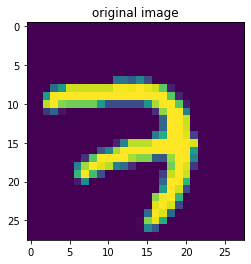

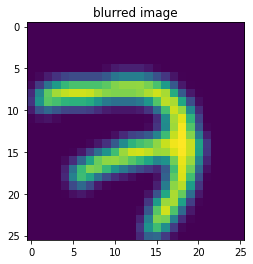

In [ ]:
import matplotlib.pyplot as plt
# a gaussian blur kernel
gaussian_kernel = torch.tensor([[1., 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0

# a convolusion
conv = nn.Conv2d(1, 1, 3)

# manually set the conv weight
conv.weight.data[:] = gaussian_kernel

# get an image produced by the convolution
convolved = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28,28).detach().numpy())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show()

As we can see, the image is blurred as expected. 


Pooling layer
--------------------------
PyTorch implements pooling layers in [Pooling layers](https://pytorch.org/docs/stable/nn.html#pooling-layers)


In [ ]:
#torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

input = torch.randn(20, 16, 50, 32)

# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
output = m(input)
print(output.shape) # Height = ⌊(50-3)/2⌋+1, Weight = ⌊(32-3)/2⌋+1

# pool of non-square window
m = nn.MaxPool2d((3, 2), stride=(2, 1))
output = m(input)
print(output.shape) # Height = ⌊(50-3)/2⌋+1, Weight = ⌊(32-2)/1⌋+1



torch.Size([20, 16, 24, 15])
torch.Size([20, 16, 24, 31])


#**Convolutional Neural Network**

An CNN example
-------------------------------

Implement a CNN to do image classification task based on CIFAR-10 dataset.

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

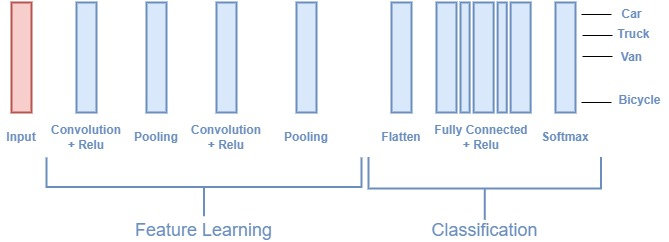

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


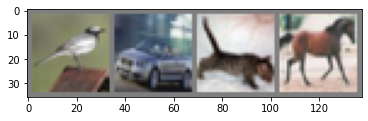

Epoch [1/5], Step [2000/12500], Loss: 2.2645
Epoch [1/5], Step [4000/12500], Loss: 2.3158
Epoch [1/5], Step [6000/12500], Loss: 2.3139
Epoch [1/5], Step [8000/12500], Loss: 2.3170
Epoch [1/5], Step [10000/12500], Loss: 2.2854
Epoch [1/5], Step [12000/12500], Loss: 2.3161
Epoch [2/5], Step [2000/12500], Loss: 2.2702
Epoch [2/5], Step [4000/12500], Loss: 2.2756
Epoch [2/5], Step [6000/12500], Loss: 2.3230
Epoch [2/5], Step [8000/12500], Loss: 3.0602
Epoch [2/5], Step [10000/12500], Loss: 2.0432
Epoch [2/5], Step [12000/12500], Loss: 1.4644
Epoch [3/5], Step [2000/12500], Loss: 2.7581
Epoch [3/5], Step [4000/12500], Loss: 2.1667
Epoch [3/5], Step [6000/12500], Loss: 2.0096
Epoch [3/5], Step [8000/12500], Loss: 1.7999
Epoch [3/5], Step [10000/12500], Loss: 1.8806
Epoch [3/5], Step [12000/12500], Loss: 1.4142
Epoch [4/5], Step [2000/12500], Loss: 0.9513
Epoch [4/5], Step [4000/12500], Loss: 1.8475
Epoch [4/5], Step [6000/12500], Loss: 1.4912
Epoch [4/5], Step [8000/12500], Loss: 1.4700
Epoc

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Design Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# Design model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth' 
torch.save(model.state_dict(), PATH) # Save the model

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        # Use GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # Get predicted class max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %') # accuracy for each class

A CNN example using Dropout and Sequential
------------------------------------------------

In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

class MLP(nn.Module):
  '''
    Multilayer Perceptron. (CNN)
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),      
      nn.Dropout(p=0.5),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.Dropout(p=0.5),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
  
if __name__ == '__main__':
  
  # Set fixed random number seed
  torch.manual_seed(42)
  
  # Prepare MNIST dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  
  # Initialize the MLP
  mlp = MLP()
  
  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
  
  # Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

Starting epoch 1
Loss after mini-batch   500: 2.216
Loss after mini-batch  1000: 1.904
Loss after mini-batch  1500: 1.614
Loss after mini-batch  2000: 1.422
Loss after mini-batch  2500: 1.294
Loss after mini-batch  3000: 1.224
Loss after mini-batch  3500: 1.121
Loss after mini-batch  4000: 1.055
Loss after mini-batch  4500: 1.044
Loss after mini-batch  5000: 0.987
Loss after mini-batch  5500: 0.955
Loss after mini-batch  6000: 0.916
Starting epoch 2
Loss after mini-batch   500: 0.881
Loss after mini-batch  1000: 0.869
Loss after mini-batch  1500: 0.803
Loss after mini-batch  2000: 0.816
Loss after mini-batch  2500: 0.821
Loss after mini-batch  3000: 0.763
Loss after mini-batch  3500: 0.766
Loss after mini-batch  4000: 0.774
Loss after mini-batch  4500: 0.750
Loss after mini-batch  5000: 0.718
Loss after mini-batch  5500: 0.745
Loss after mini-batch  6000: 0.694
Starting epoch 3
Loss after mini-batch   500: 0

#**Save and load the model**

In this part we will look at how to persist model state with saving, loading and running model predictions.


Saving and Loading Model Weights
--------------------------------
PyTorch models store the learned parameters in an internal
state dictionary, called ``state_dict``. These can be persisted via the ``torch.save``
method:



In [4]:
import torchvision.models as models
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

To load model weights, you need to create an instance of the same model first, and then load the parameters
using ``load_state_dict()`` method.



In [5]:
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Note: be sure to call ```model.eval()``` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.</p></div>



Saving and Loading Models with Shapes
-------------------------------------
When loading model weights, we needed to instantiate the model class first, because the class
defines the structure of a network. We might want to save the structure of this class together with
the model, in which case we can pass ``model`` (and not ``model.state_dict()``) to the saving function:



In [6]:
torch.save(model, 'model.pth')

We can then load the model like this:



In [7]:
model = torch.load('model.pth')

Note: This approach uses Python [pickle](https://docs.python.org/3/library/pickle.html) module when serializing the model, thus it relies on the actual class definition to be available when loading the model.</p></div>

